### Question 2

#### a) What business rule should Morrison use to determine which member receives a solicitation?

To determine which member receives a solicitation for donations, Mark Morrison should use a business rule derived from a predictive model that estimates the likelihood of a member making a donation if solicited. This model should consider various factors such as demographics, member engagement (e.g., visitation frequency, years of membership), financial capacity (e.g., income bracket), and any past donation history if available. 

#### b) Assume Morrison has come to you to help him build a predictive model to determine the likelihood that each member will donate, so that IPFA can choose to send the solicitation only to those members whose likelihood of donation is sufficiently high.

To help you begin, he has taken the pilot test data and created a randomly- selected training set and a validation set, clearly labeled per their variable names in the data. However, he has asked for you a theory – or your best guess – of which members are most likely to donate. Your experience in museum fundraising suggests four factors: members’ age, how long they’ve been a member, how much money they make, and whether they have a history of spending disposable income at the museum. And so, you choose to run the a predictive model for the training set only:
- A logistic regression, with:
    - Outcome: giveinpilot
    - Predictors: age incomebracket yearsmember otherspend
    
Please transform incomebracket into dummy variables for inclusion in the model,
so that each incomebracket level is represented independently.

What would be the expected net return of the predictive model and resultant targeting strategy if you were to apply the above model to the 56,680 members who were not in the pilot test? Make sure to include the known cost of the pilot test itself in this calculation.

In [1]:
# Load data
import pandas as pd
df = pd.read_excel('IPFA_DonorData.xlsx')
df.head()

,memberid,sex,age,incomebracket,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,pilottest,giveinpilot,pilottesttrainingset,pilottestvalidationset
0,111433425,1,48,1,15,4,1,1,1,0,0,NaN,NaN,NaN
1,111469745,0,55,1,13,5,4,1,0,70,1,0.0,0.0,1.0
2,111703284,1,45,1,27,1,9,1,0,0,1,0.0,1.0,0.0
3,111803259,1,66,1,8,4,1,1,0,22,1,0.0,0.0,1.0
4,111926134,0,43,1,25,4,18,1,0,0,0,NaN,NaN,NaN


In [2]:
# Calculating the value counts for the 'giveinpilot' column in the entire dataset
giveinpilot_counts = df['giveinpilot'].value_counts()
giveinpilot_counts


giveinpilot
0.0    13303
1.0      694
Name: count, dtype: int64

In [3]:

# Transforming 'incomebracket' into dummy variables

income_dummies = pd.get_dummies(df['incomebracket'], prefix='incomebracket')
data_with_dummies = pd.concat([df, income_dummies], axis=1)
# Dropping the original 'incomebracket' column and preparing the data with dummy variables
data_with_dummies = data_with_dummies.drop('incomebracket', axis=1)
data_with_dummies.head()


,memberid,sex,age,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,pilottest,giveinpilot,pilottesttrainingset,pilottestvalidationset,incomebracket_1,incomebracket_2,incomebracket_3,incomebracket_4,incomebracket_5
0,111433425,1,48,15,4,1,1,1,0,0,NaN,NaN,NaN,True,False,False,False,False
1,111469745,0,55,13,5,4,1,0,70,1,0.0,0.0,1.0,True,False,False,False,False
2,111703284,1,45,27,1,9,1,0,0,1,0.0,1.0,0.0,True,False,False,False,False
3,111803259,1,66,8,4,1,1,0,22,1,0.0,0.0,1.0,True,False,False,False,False
4,111926134,0,43,25,4,18,1,0,0,0,NaN,NaN,NaN,True,False,False,False,False


In [4]:
# Differentiate pilot and non-pilot data
df_pilot = data_with_dummies[data_with_dummies['pilottest'] == 1]
df_non_pilot = data_with_dummies[data_with_dummies['pilottest'] == 0]

In [6]:
# split training and validation set within dataset
pilot_training =df_pilot[df_pilot['pilottesttrainingset']==1]
pilot_valid=df_pilot[df_pilot['pilottestvalidationset']==1]

In [7]:
# split x and y for training
X_pilot_training = pilot_training[['age',  'yearsmember', 'otherspend','incomebracket_1', 'incomebracket_2',
       'incomebracket_3', 'incomebracket_4', 'incomebracket_5']]
Y_pilot_training = pilot_training['giveinpilot']

In [8]:
# split x and y for validation
X_pilot_valid = pilot_valid[['age',  'yearsmember', 'otherspend','incomebracket_1', 'incomebracket_2',
       'incomebracket_3', 'incomebracket_4', 'incomebracket_5']]
Y_pilot_valid = pilot_valid['giveinpilot']

In [9]:
Y_pilot_training.value_counts()

giveinpilot
0.0    7962
1.0     427
Name: count, dtype: int64

In [10]:
Y_pilot_valid.value_counts()

giveinpilot
0.0    5341
1.0     267
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
# Applying SMOTE to handle imbalance in the dataset
smote = SMOTE(random_state=42)
#X_train_resampled, Y_train_resampled = smote.fit_resample(X_pilot_training,Y_pilot_training)
X_train_resampled, Y_train_resampled = X_pilot_training,Y_pilot_training
Y_train_resampled.value_counts()

giveinpilot
0.0    7962
1.0     427
Name: count, dtype: int64

In [12]:
smote = SMOTE(random_state=42)
X_valid_resampled, Y_valid_resampled = smote.fit_resample(X_pilot_valid, Y_pilot_valid)
Y_valid_resampled.value_counts()

giveinpilot
0.0    5341
1.0    5341
Name: count, dtype: int64

In [13]:
logregression = LogisticRegression()

# Train the model
logregression.fit(X_train_resampled, Y_train_resampled)



c:\Users\zy\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
X_non_pilot = df_non_pilot[['age', 'yearsmember', 'otherspend','incomebracket_1', 'incomebracket_2',
       'incomebracket_3', 'incomebracket_4', 'incomebracket_5']]
X_non_pilot

,age,yearsmember,otherspend,incomebracket_1,incomebracket_2,incomebracket_3,incomebracket_4,incomebracket_5
0,48,15,0,True,False,False,False,False
4,43,25,0,True,False,False,False,False
5,31,13,64,True,False,False,False,False
6,46,22,40,True,False,False,False,False
7,46,28,44,True,False,False,False,False
...,...,...,...,...,...,...,...,...
70670,59,2,28,False,False,False,False,True
70672,55,10,0,False,False,False,False,True
70674,37,9,66,False,False,False,False,True
70675,58,3,3,False,False,False,False,True


In [15]:
# Make predictions on the non-pilot set

y_pred_non_pilot = logregression.predict_proba(X_non_pilot)
y_pred_non_pilot

array([[0.95550987, 0.04449013],
       [0.95640389, 0.04359611],
       [0.9503399 , 0.0496601 ],
       ...,
       [0.93189488, 0.06810512],
       [0.93779467, 0.06220533],
       [0.93974714, 0.06025286]])

In [16]:
pd.Series(y_pred_non_pilot[:, 1] ).describe() 
#probability of class 1 distribution

count    56680.000000
mean         0.050807
std          0.009468
min          0.031422
25%          0.046576
50%          0.049935
75%          0.054367
max          0.212493
dtype: float64

In [17]:
# Revising the provided code as per the new threshold requirement

# Initialize empty list for storing the results
return_dataset = []

# Initialize the threshold
threshold = 0
step = 0.01

# Loop until threshold reaches 0.58
while threshold < 0.2:
    expected_net_return = 0
    for prob in y_pred_non_pilot[:, 1]:
        if prob >= threshold:
            expected_net_return += (prob *(300-20) - (1 - prob) * 15)
    expected_net_return -= 5225  # Subtracting the cost of the pilot test
      

    # Append the data as a new row to the dataset
    return_dataset.append({
        "threshold": threshold,
        "net return": expected_net_return
    })

    # Increment the threshold by the step value
    threshold += step

# Converting the results to a DataFrame for easier analysis
results_df = pd.DataFrame(return_dataset)
results_df.head(10)  # Displaying the first few rows of the dataframe


,threshold,net return
0,0.00,-5894.835429
1,0.01,-5894.835429
2,0.02,-5894.835429
3,0.03,-5894.835429
4,0.04,24703.894606
5,0.05,47997.075186
6,0.06,33668.307827
7,0.07,6501.303284
8,0.08,-64.590057
9,0.09,-2351.090020


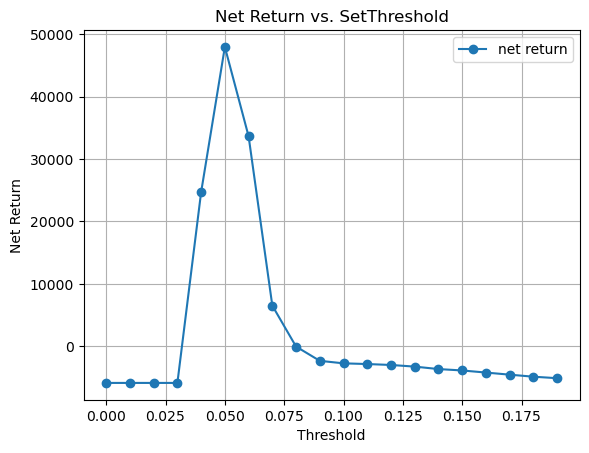

In [18]:
# Create a line plot
import matplotlib.pyplot as plt
results_df.plot(x='threshold', y='net return', marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Threshold')
plt.ylabel('Net Return')
plt.title('Net Return vs. SetThreshold')

# Show the plot
plt.grid(True)
plt.show()

## Q3

In [2]:
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('IPFA_DonorData.xlsx')

In [4]:
# Filtering the dataset to filter people who were in pilot test
X_non_pilot = df[df.pilottest == 0]
df = df[df.pilottest == 1]

In [5]:
df.head()

,memberid,sex,age,incomebracket,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,pilottest,giveinpilot,pilottesttrainingset,pilottestvalidationset
1,111469745,0,55,1,13,5,4,1,0,70,1,0.0,0.0,1.0
2,111703284,1,45,1,27,1,9,1,0,0,1,0.0,1.0,0.0
3,111803259,1,66,1,8,4,1,1,0,22,1,0.0,0.0,1.0
17,114116342,1,67,1,7,2,9,1,0,73,1,0.0,1.0,0.0
20,114885727,1,57,1,35,5,18,1,0,20,1,0.0,0.0,1.0


In [6]:
cols_to_use = ['sex','age', 'incomebracket', 'yearsmember', 
               'levelofeducation', 'totalvisitsasmember','maritalstatus',
               'visitedinlast6months','otherspend','giveinpilot', 'pilottesttrainingset', 'pilottestvalidationset'
              ]

X_non_pilot = X_non_pilot[cols_to_use]
df = df[cols_to_use]
df.head()

,sex,age,incomebracket,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,giveinpilot,pilottesttrainingset,pilottestvalidationset
1,0,55,1,13,5,4,1,0,70,0.0,0.0,1.0
2,1,45,1,27,1,9,1,0,0,0.0,1.0,0.0
3,1,66,1,8,4,1,1,0,22,0.0,0.0,1.0
17,1,67,1,7,2,9,1,0,73,0.0,1.0,0.0
20,1,57,1,35,5,18,1,0,20,0.0,0.0,1.0


In [7]:
df_final = pd.get_dummies(df, columns=['incomebracket','levelofeducation'], drop_first=True)
X_non_pilot = pd.get_dummies(X_non_pilot, columns=['incomebracket','levelofeducation'], drop_first=True)
df_final.head()

,sex,age,yearsmember,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,giveinpilot,pilottesttrainingset,pilottestvalidationset,incomebracket_2,incomebracket_3,incomebracket_4,incomebracket_5,levelofeducation_2,levelofeducation_3,levelofeducation_4,levelofeducation_5
1,0,55,13,4,1,0,70,0.0,0.0,1.0,False,False,False,False,False,False,False,True
2,1,45,27,9,1,0,0,0.0,1.0,0.0,False,False,False,False,False,False,False,False
3,1,66,8,1,1,0,22,0.0,0.0,1.0,False,False,False,False,False,False,True,False
17,1,67,7,9,1,0,73,0.0,1.0,0.0,False,False,False,False,True,False,False,False
20,1,57,35,18,1,0,20,0.0,0.0,1.0,False,False,False,False,False,False,False,True


In [8]:
df_train = df_final[df_final.pilottesttrainingset == 1]
df_test  = df_final[df_final.pilottestvalidationset == 1]


df_train.drop(columns = ['pilottesttrainingset','pilottestvalidationset'], axis=1, inplace=True)
df_test.drop(columns = ['pilottesttrainingset','pilottestvalidationset'], axis=1, inplace=True)
X_non_pilot.drop(columns = ['pilottesttrainingset','pilottestvalidationset','giveinpilot'], axis=1, inplace=True)

print(df_train.shape[0], df_test.shape[0], df_train.shape[0] + df_test.shape[0])

8389 5608 13997


In [40]:
X_train = df_train.drop('giveinpilot', axis=1)
y_train = df_train['giveinpilot'].astype('int')

X_test = df_test.drop('giveinpilot', axis=1)
y_test = df_test['giveinpilot'].astype('int')

X_train = np.asarray(X_train).astype('float')
X_test = np.asarray(X_test).astype('float')
X_non_pilot = np.asarray(X_non_pilot).astype('float')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8389, 15) (8389,) (5608, 15) (5608,)


In [41]:
# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Create and fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.177157
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            giveinpilot   No. Observations:                 8389
Model:                          Logit   Df Residuals:                     8373
Method:                           MLE   Df Model:                           15
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1193
Time:                        20:12:34   Log-Likelihood:                -1486.2
converged:                       True   LL-Null:                       -1687.5
Covariance Type:            nonrobust   LLR p-value:                 1.903e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5705      0.419     -3.746      0.000      -2.392      -0.749
x1            -0.0322      0.

In [11]:
X_non_pilot= sm.add_constant(X_non_pilot)
y_pred_non_pilot = result.predict(X_non_pilot)

In [12]:
y_pred_non_pilot

array([0.08333558, 0.0020052 , 0.00297782, ..., 0.13177885, 0.01132615,
       0.1941672 ])

In [13]:
# Revising the provided code as per the new threshold requirement

# Initialize empty list for storing the results
return_dataset = []

# Initialize the threshold
threshold = 0
step = 0.01

# Loop until threshold reaches 0.58
while threshold < 0.2:
    expected_net_return = 0
    for prob in y_pred_non_pilot:
        if prob >= threshold:
            expected_net_return += (prob *(300-20) - (1 - prob) * 15)
    expected_net_return -= 5225  # Subtracting the cost of the pilot test
      

    # Append the data as a new row to the dataset
    return_dataset.append({
        "threshold": threshold,
        "net return": expected_net_return
    })

    # Increment the threshold by the step value
    threshold += step

# Converting the results to a DataFrame for easier analysis
results_df = pd.DataFrame(return_dataset)
results_df.head(10)  # Displaying the first few rows of the dataframe


,threshold,net return
0,0.00,-6254.973726
1,0.01,213526.088086
2,0.02,282931.259423
3,0.03,313861.368672
4,0.04,328094.091345
5,0.05,332173.525343
6,0.06,329956.312960
7,0.07,320839.159671
8,0.08,298139.798729
9,0.09,264316.703399


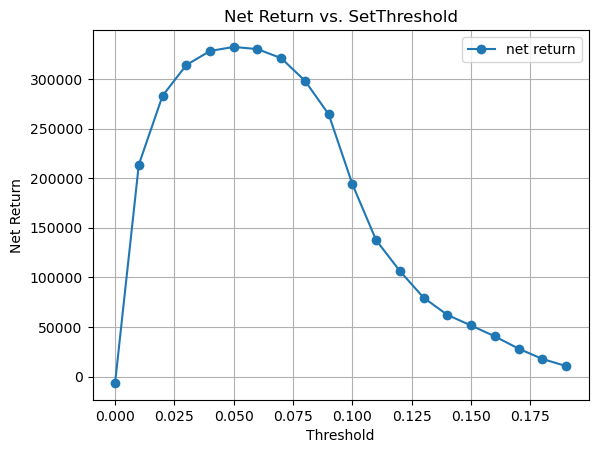

In [14]:
# Create a line plot
import matplotlib.pyplot as plt
results_df.plot(x='threshold', y='net return', marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Threshold')
plt.ylabel('Net Return')
plt.title('Net Return vs. SetThreshold')

# Show the plot
plt.grid(True)
plt.show()

## Extra Credits

In [52]:
X_non_pilot = X_non_pilot[:, 1:]    # remove the intercept added by sm.constant

X_train = df_train.drop('giveinpilot', axis=1)
y_train = df_train['giveinpilot'].astype('int')

X_test = df_test.drop('giveinpilot', axis=1)
y_test = df_test['giveinpilot'].astype('int')

X_train = np.asarray(X_train).astype('float')
X_test = np.asarray(X_test).astype('float')

In [53]:
X_non_pilot.shape

(56680, 15)

In [54]:
X_train.shape

(8389, 15)

In [80]:
def get_net_return(y_hat, threshold):
    """Helper function to compute the net return"""
    solicitation = y_hat[y_hat[:, 1] >= threshold]

    n = solicitation.shape[0]
    matrix = np.column_stack((np.full(n, -15), np.full(n, 280)))

    return np.sum(solicitation * matrix)

In [89]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)
y_hat_prob = clf.predict_proba(X_non_pilot)

In [104]:
# Revising the provided code as per the new threshold requirement

# Initialize empty list for storing the results
return_dataset = []

# Initialize the threshold
threshold = 0
step = 0.01

# Loop until threshold reaches 0.58
while threshold < 0.2:
    expected_net_return = get_net_return(y_hat_prob, threshold)
    expected_net_return -= 5225  # Subtracting the cost of the pilot test

    # Append the data as a new row to the dataset
    return_dataset.append({
        "threshold": threshold,
        "net return": expected_net_return
    })

    # Increment the threshold by the step value
    threshold += step

# Converting the results to a DataFrame for easier analysis
results_df = pd.DataFrame(return_dataset)
results_df.head(10)  # Displaying the first few rows of the dataframe


,threshold,net return
0,0.00,84948.270000
1,0.01,383656.303333
2,0.02,383716.553333
3,0.03,474741.886667
4,0.04,474765.503333
5,0.05,495517.503333
6,0.06,483055.946667
7,0.07,483041.946667
8,0.08,483010.943333
9,0.09,454250.523333


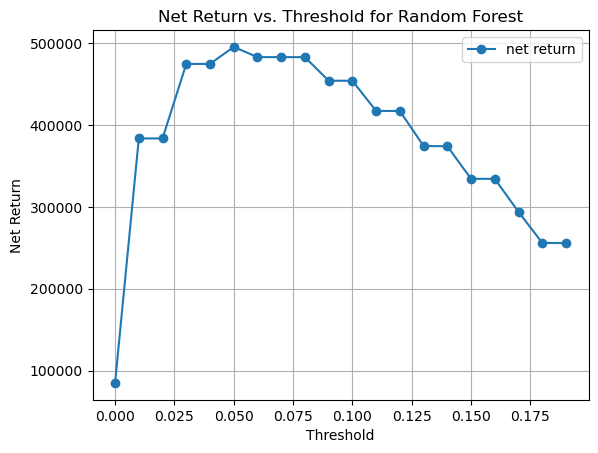

In [106]:
# Create a line plot
import matplotlib.pyplot as plt
results_df.plot(x='threshold', y='net return', marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Threshold')
plt.ylabel('Net Return')
plt.title('Net Return vs. Threshold for Random Forest')

# Show the plot
plt.grid(True)
plt.show()